In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir unzipped_archive
!cp /content/drive/MyDrive/unzipped_archive/ARCHIVE---------------.zip /content/unzipped_archive/archive.zip
!unzip unzipped_archive/archive.zip -d unzipped_archive/

Archive:  unzipped_archive/archive.zip
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Abdullah_Gul/Abdullah_Gul_0001.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Abdullah_Gul/Abdullah_Gul_0002.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Abdullah_Gul/Abdullah_Gul_0003.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Abdullah_Gul/Abdullah_Gul_0004.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Abdullah_Gul/Abdullah_Gul_0005.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Adrien_Brody/Adrien_Brody_0001.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Adrien_Brody/Adrien_Brody_0002.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Adrien_Brody/Adrien_Brody_0003.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_without_Mask/Adrien_Brody/Adrien_Brody_0004.jpg  
  inflating: unzipped_archive/LFW_without_Mask/LFW_w

In [3]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

import pandas as pd

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


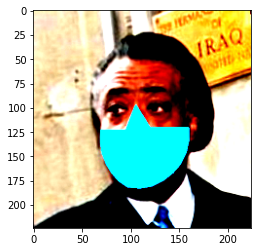

In [4]:
filename = "/content/unzipped_archive/Masked_LFW_Dataset/Masked_LFW_Dataset/Al_Sharpton_0003.jpg"
input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

plt.imshow(torch.swapaxes(torch.swapaxes(input_tensor, 0, 2), 0, 1))
plt.show()

In [24]:
import os

discover = "/content/unzipped_archive/"

masked = []
naked = []

#masked_reg = r'^(\/content\/unzipped_archive\/Masked_LFW_Dataset\/Masked_LFW_Dataset)\/(([A-z]*)_[0-9]{4}\.jpg)$'
masked_reg = r'^(\/content\/unzipped_archive\/Masked_LFW_Dataset\/Masked_LFW_Dataset)\/((.*)_[0-9]{4}\.jpg)$'

#naked_reg = r'^(\/content\/unzipped_archive\/LFW_without_Mask\/LFW_without_Mask)\/((([A-Z|a-z]+)(_([A-Z|a-z]+))*)\/\3_[0-9]{4}\.jpg)$'
naked_reg = r'^(\/content\/unzipped_archive\/LFW_without_Mask\/LFW_without_Mask)\/((.*)\/\3_[0-9]{4}\.jpg)$'


paths = []

for root, dirs, files in os.walk(discover, topdown=False):
  for name in files:
    paths.append((root, name))


In [25]:
df = pd.DataFrame(paths, columns=['root', 'filename'])
df['fullpath'] = df['root'] + '/' + df['filename']
df['isMasked'] = df['fullpath'].apply(lambda x: re.match(masked_reg, x) is not None)
df['isNaked'] = df['fullpath'].apply(lambda x: re.match(naked_reg, x) is not None)
df['drop']  = ~(df['isMasked'] | df['isNaked'])
df = df[~df['drop']][['fullpath', 'filename', 'isMasked']].copy()
df['person'] = df['filename'].apply(lambda x: " ".join(x.split("_")[:-1]))

extract_photo_id = lambda x: re.findall(r"_([0-9]{4})", x)[0]

df['personImg'] = df['filename'].apply(extract_photo_id)
#df[['person', 'isMasked', 'personImg']].groupby(['person']).apply(print)

imgs = df[(df['person'] == 'Jennifer Aniston') & (df['personImg'] == '0004')]['fullpath'].values

names = sorted(df['person'].unique())
name_to_idx = {names[i]: i for i in range(len(names))}
idx_to_name = {v: k for k, v in name_to_idx.items()}

name_to_idx

{'Abdullah Gul': 0,
 'Adrien Brody': 1,
 'Ahmed Chalabi': 2,
 'Ai Sugiyama': 3,
 'Al Gore': 4,
 'Al Sharpton': 5,
 'Alan Greenspan': 6,
 'Alastair Campbell': 7,
 'Albert Costa': 8,
 'Alejandro Toledo': 9,
 'Ali Naimi': 10,
 'Allyson Felix': 11,
 'Alvaro Uribe': 12,
 'Amelia Vega': 13,
 'Amelie Mauresmo': 14,
 'Ana Guevara': 15,
 'Ana Palacio': 16,
 'Andre Agassi': 17,
 'Andy Roddick': 18,
 'Angela Bassett': 19,
 'Angela Merkel': 20,
 'Angelina Jolie': 21,
 'Ann Veneman': 22,
 'Anna Kournikova': 23,
 'Antonio Banderas': 24,
 'Antonio Palocci': 25,
 'Ari Fleischer': 26,
 'Ariel Sharon': 27,
 'Arminio Fraga': 28,
 'Arnold Schwarzenegger': 29,
 'Arnoldo Aleman': 30,
 'Ashanti': 31,
 'Atal Bihari Vajpayee': 32,
 'Ben Affleck': 33,
 'Benazir Bhutto': 34,
 'Benjamin Netanyahu': 35,
 'Bernard Law': 36,
 'Bertie Ahern': 37,
 'Bill Clinton': 38,
 'Bill Frist': 39,
 'Bill Gates': 40,
 'Bill Graham': 41,
 'Bill McBride': 42,
 'Bill Simon': 43,
 'Billy Crystal': 44,
 'Binyamin Ben-Eliezer': 45,
 'B

In [21]:
# Create subsets
df_masked = df[df['isMasked']]
df_naked = df[~df['isMasked']]

In [26]:
import numpy as np

def split_dataset(df_: pd.DataFrame, label_col: str, train_size : float = .7, img_identifier_col='personImg'):
  df_ = df_.copy()
  assert 0 <= train_size <= 1

  val_size = 1. - train_size 

  df_['isTrain'] = False


  def split_group(grouped_df: pd.DataFrame):
    grouped_df = grouped_df.copy().reset_index(drop=True)
    img_idx = grouped_df['personImg'].unique()

    train_idx, val_idx = train_test_split(img_idx, train_size=train_size, random_state=45)
    train_rows = grouped_df[img_identifier_col].isin(train_idx)

    grouped_df.loc[train_rows, 'isTrain'] = True

    #import pdb; pdb.set_trace()

    return grouped_df

  grouped = df_.groupby(label_col).apply(split_group).reset_index(drop=True)
  #grouped = pd.read_parquet('split.parquet')
  train_idx = grouped['isTrain']
  df_ = df_.drop('isTrain', axis=1)
  #import pdb; pdb.set_trace()
  train_df, val_df = grouped[train_idx], grouped[~train_idx]
  

  return {'train': train_df, 'val': val_df}

split = split_dataset(df_=df, label_col='person')
split

{'train':                                                fullpath  ... isTrain
 0     /content/unzipped_archive/LFW_without_Mask/LFW...  ...    True
 2     /content/unzipped_archive/LFW_without_Mask/LFW...  ...    True
 3     /content/unzipped_archive/LFW_without_Mask/LFW...  ...    True
 5     /content/unzipped_archive/Masked_LFW_Dataset/M...  ...    True
 7     /content/unzipped_archive/Masked_LFW_Dataset/M...  ...    True
 ...                                                 ...  ...     ...
 4109  /content/unzipped_archive/LFW_without_Mask/LFW...  ...    True
 4110  /content/unzipped_archive/LFW_without_Mask/LFW...  ...    True
 4112  /content/unzipped_archive/Masked_LFW_Dataset/M...  ...    True
 4114  /content/unzipped_archive/Masked_LFW_Dataset/M...  ...    True
 4115  /content/unzipped_archive/Masked_LFW_Dataset/M...  ...    True
 
 [2477 rows x 6 columns],
 'val':                                                fullpath  ... isTrain
 1     /content/unzipped_archive/LFW_without_M

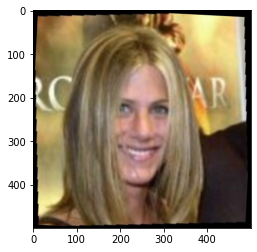

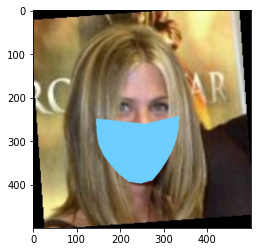

In [27]:
for img in imgs:
  im = Image.open(img)
  plt.imshow(im)
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


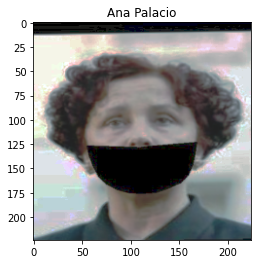

In [32]:
from torch.utils.data import Dataset
from torchvision.io import read_image

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(.5, 1.)),
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

class PandasDataset(Dataset):
    def __init__(self, df: pd.DataFrame, transform=None, target_transform=None,
                 path_col = 'fullpath', label_col = 'person'):
        self.df = df.copy()
        self.img_paths = df[path_col]
        self.labels = df[label_col]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        path = self.img_paths.iloc[idx]
        image = Image.open(path)
        label = self.labels.iloc[idx]


        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)

        return image, label

def tokenize_names(name: str):
  return name_to_idx[name]

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

datasets = {key: PandasDataset(split[key], transform=data_transforms[key], target_transform=tokenize_names) for key in ['train', 'val']}
dataloaders = {key: torch.utils.data.DataLoader(datasets[key], batch_size=32, shuffle=True, num_workers=4) for key in ['train', 'val']}

image, label = datasets['train'][100]
imshow(image, idx_to_name[label])

In [29]:
(set(datasets['val'].labels)) - set(datasets['train'].labels), (set(datasets['train'].labels)) - set(datasets['val'].labels), len(datasets['val'].labels.unique())

(set(), set(), 423)

In [33]:
import time
import copy
import os

DEVICE = 'cuda'


def train_model(model, criterion, dataloaders, optimizer, scheduler, num_epochs=25,):
    since = time.time()

    val_acc_history = []
    logs = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            logs.append('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history, logs

In [ ]:
import torchvision

model = torchvision.models.resnet18(pretrained=True)

if type(model) == torchvision.models.vgg.VGG:
  num_ftrs = model.classifier[6].in_features
  model.classifier[6] = nn.Linear(num_ftrs, len(name_to_idx))
else:
  num_ftrs = model.fc.in_features
  model.fc = nn.Linear(num_ftrs, len(name_to_idx))

model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, dataloaders, optimizer, exp_lr_scheduler, num_epochs=50)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/49
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 6.2205 Acc: 0.0036
val Loss: 6.0966 Acc: 0.0037

Epoch 1/49
----------
train Loss: 6.0506 Acc: 0.0057
val Loss: 6.0207 Acc: 0.0079

Epoch 2/49
----------
train Loss: 5.9317 Acc: 0.0137
val Loss: 5.9345 Acc: 0.0128

Epoch 3/49
----------
train Loss: 5.7971 Acc: 0.0315
val Loss: 5.8344 Acc: 0.0220

Epoch 4/49
----------
train Loss: 5.6553 Acc: 0.0472
val Loss: 5.7045 Acc: 0.0317

Epoch 5/49
----------
train Loss: 5.4950 Acc: 0.0634
val Loss: 5.5588 Acc: 0.0494

Epoch 6/49
----------
train Loss: 5.3127 Acc: 0.1231
val Loss: 5.4078 Acc: 0.0567

Epoch 7/49
----------
train Loss: 5.1126 Acc: 0.1692
val Loss: 5.2591 Acc: 0.0933

Epoch 8/49
----------
train Loss: 4.9275 Acc: 0.2128
val Loss: 5.1127 Acc: 0.1018

Epoch 9/49
----------
train Loss: 4.7268 Acc: 0.2725
val Loss: 4.9438 Acc: 0.1293

Epoch 10/49
----------
train Loss: 4.5512 Acc: 0.3109
val Loss: 4.7864 Acc: 0.1494

Epoch 11/49
----------
train Loss: 4.3506 Acc: 0.3585
val Loss: 4.6396 Acc: 0.1707

Epoch 12/49
----------
t

In [ ]:
torch.save(model, 'last_resnet_combined.pt')
!cp last_resnet_combined.pt /content/drive/MyDrive/unzipped_archive/last_resnet_combined.pt

In [ ]:
#!zip -r models.zip new_*.pt
#!cp models.zip /content/drive/MyDrive/unzipped_archive/fixed_models.zip

  adding: new_resnet_general.pt (deflated 7%)
  adding: new_resnet_masked.pt (deflated 7%)
  adding: new_resnet_naked.pt (deflated 7%)
  adding: new_vgg_general.pt (deflated 7%)
  adding: new_vgg_masked.pt (deflated 7%)
  adding: new_vgg_naked.pt (deflated 7%)


In [12]:
# Dec 7, loading 
!cp /content/drive/MyDrive/unzipped_archive/fixed_models.zip models.zip
!unzip models.zip -d unzip
model = torch.load('unzip/new_resnet_general.pt')[0]
model

Archive:  models.zip
  inflating: unzip/new_resnet_general.pt  
  inflating: unzip/new_resnet_masked.pt  
  inflating: unzip/new_resnet_naked.pt  
  inflating: unzip/new_vgg_general.pt  
  inflating: unzip/new_vgg_masked.pt  
  inflating: unzip/new_vgg_naked.pt  


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
n = 0
n_c = 0
for img, label in dataloaders['val'].dataset:
  out = model(img.unsqueeze(0).to(DEVICE))
  _, pred = torch.max(out, 1)
  pred = pred.item()
  
  n += 1

  if pred == label:
    n_c += 1

print(n_c/n)


0.0


In [18]:
name_to_idx

{'Abdullah Gul': 330,
 'Adrien Brody': 274,
 'Ahmed Chalabi': 231,
 'Ai Sugiyama': 77,
 'Al Gore': 133,
 'Al Sharpton': 110,
 'Alan Greenspan': 249,
 'Alastair Campbell': 37,
 'Albert Costa': 3,
 'Alejandro Toledo': 181,
 'Ali Naimi': 233,
 'Allyson Felix': 200,
 'Alvaro Uribe': 238,
 'Amelia Vega': 382,
 'Amelie Mauresmo': 180,
 'Ana Guevara': 6,
 'Ana Palacio': 311,
 'Andre Agassi': 369,
 'Andy Roddick': 61,
 'Angela Bassett': 336,
 'Angela Merkel': 208,
 'Angelina Jolie': 79,
 'Ann Veneman': 237,
 'Anna Kournikova': 63,
 'Antonio Banderas': 72,
 'Antonio Palocci': 356,
 'Ari Fleischer': 357,
 'Ariel Sharon': 408,
 'Arminio Fraga': 394,
 'Arnold Schwarzenegger': 105,
 'Arnoldo Aleman': 103,
 'Ashanti': 38,
 'Atal Bihari Vajpayee': 156,
 'Ben Affleck': 281,
 'Benazir Bhutto': 146,
 'Benjamin Netanyahu': 198,
 'Bernard Law': 360,
 'Bertie Ahern': 315,
 'Bill Clinton': 30,
 'Bill Frist': 333,
 'Bill Gates': 276,
 'Bill Graham': 187,
 'Bill McBride': 184,
 'Bill Simon': 378,
 'Billy Crys